Defects in /content/sample2.jpg: 1


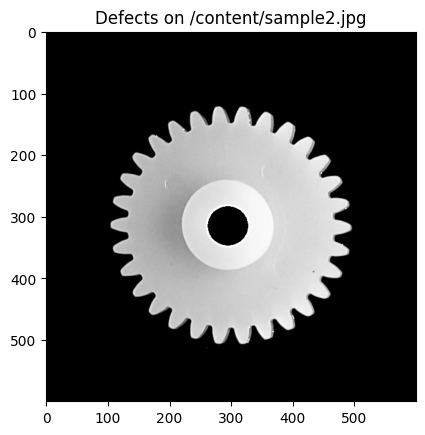

Defects in /content/sample3.jpg: 5


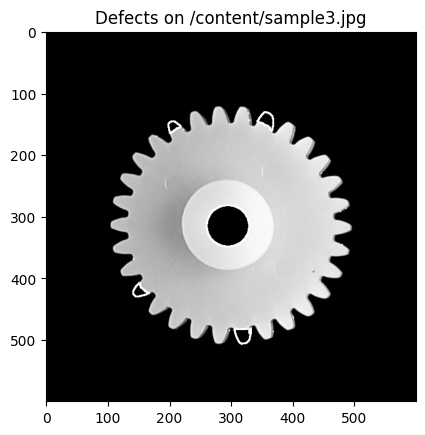

Defects in /content/sample4.jpg: 1


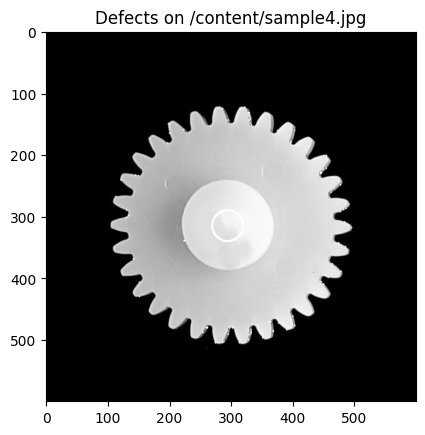

Defects in /content/sample5.jpg: 9


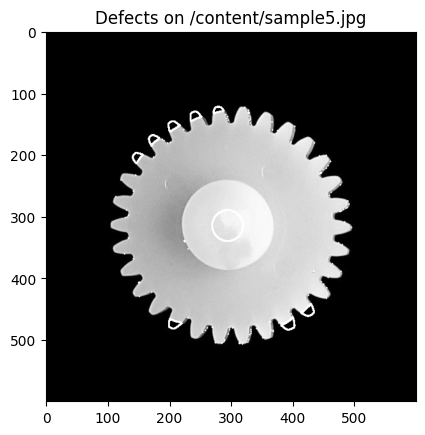

Defects in /content/sample6.jpg: 5


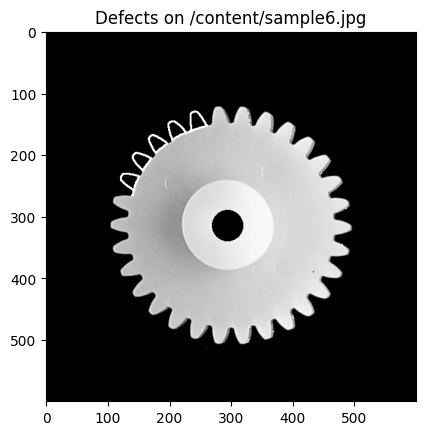

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#loading images
def load_images(image_paths):
    images = {}
    for path in image_paths:
        image = cv.imread(path, cv.IMREAD_GRAYSCALE) #Converting the image into grayscale
        if image is None:
            print(f"Failed to load image: {path}")
        else:
            images[path] = image
    return images

# Preprocessing images
def preprocess_image(image):
    # Thresholding and improving image quality
    _, threshed = cv.threshold(image, 128, 255, cv.THRESH_BINARY_INV)
    return threshed

# Function for contour detection
def detect_contours(image):
    contours, _ = cv.findContours(image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    return contours

# Function to calculate defects
def calculate_defects(ideal_image, sample_image):
    # Preprocess images
    ideal_threshed = preprocess_image(ideal_image)
    sample_threshed = preprocess_image(sample_image)

    # Bitwise operation to find differences
    diff = cv.bitwise_xor(ideal_threshed, sample_threshed)

    # Detect contours in the difference image
    contours = detect_contours(diff)

    # Analyze contours to identify defects
    total_defects = 0
    for contour in contours:
        area = cv.contourArea(contour)
        if area > 50:  # this threshold can be adjusted based on the size of defects
            total_defects += 1

    return total_defects, contours

# Paths to images
image_paths = [
    '/content/ideal.jpg',
    '/content/sample2.jpg',
    '/content/sample3.jpg',
    '/content/sample4.jpg',
    '/content/sample5.jpg',
    '/content/sample6.jpg'
]

# Load images
images = load_images(image_paths)

# Analyze each sample against the ideal gear
ideal_image = images.get('/content/ideal.jpg')  # .get is used to handle potential missing keys
if ideal_image is None:
    print("Ideal image not found.")  # Handle the case where the ideal image is missing
else:
    for sample_path in image_paths[1:]:  # Skip the ideal image
        sample_image = images.get(sample_path)
        if sample_image is None:
            print(f"Sample image not found: {sample_path}")  # Handle the case where a sample image is missing
            continue  # Skip to the next sample if the current one is not found

        total_defects, contours = calculate_defects(ideal_image, sample_image)
        print(f"Defects in {sample_path}: {total_defects}")

        # Here you could also visualize the defects on the sample image
        sample_with_defects = sample_image.copy()
        cv.drawContours(sample_with_defects, contours, -1, (255, 0, 0), 2)

        plt.imshow(sample_with_defects, cmap='gray')
        plt.title(f'Defects on {sample_path}')
        plt.show()